<a href="https://colab.research.google.com/github/tomyrso/mat281_portfolio/blob/master/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071


<a id='p1'></a>
## I.- Problema 01


<img src="https://plus.unsplash.com/premium_photo-1661963439471-0d0eeb1330d4?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2FsaWZvcm5pYSUyMGhvdXNlfGVufDB8fDB8fHww" width = "400" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [25]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


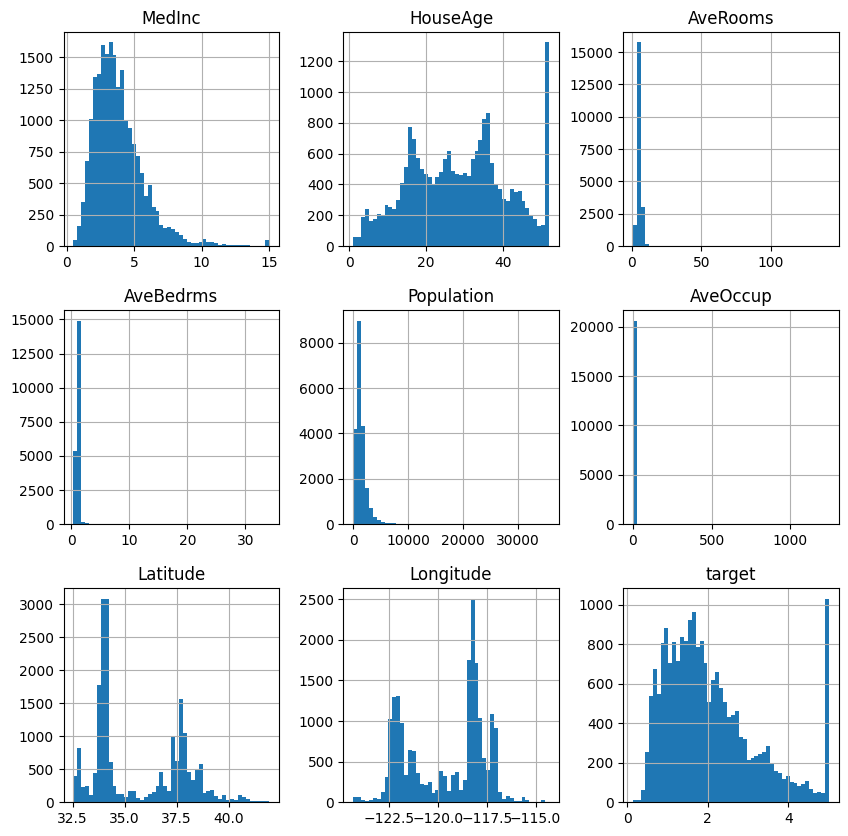

In [26]:
estadisticas = housing.describe()
estadisticas

housing.hist(bins=50, figsize=(10,10))
plt.show()

In [27]:
#Pre procesamiento de datos

# Estandarización
scaler = StandardScaler()
housing_standard = scaler.fit_transform(housing)
housing_standard = pd.DataFrame(housing_standard, columns = housing.columns)

# Separamos las variables
X = housing_standard.drop('target', axis = 1).values
Y = housing['target'].values

# Separamos los datos de entrenamiento y datos de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

print('Separando informacion:\n')
print('numero de filas data original : ', len(X))
print('numero de filas train set     : ', len(X_train))
print('numero de filas test set      : ', len(X_test))

Separando informacion:

numero de filas data original :  20640
numero de filas train set     :  16512
numero de filas test set      :  4128


In [28]:
#Regresion Lineal

start = time.time()
LR = LinearRegression()
LR.fit(X_train, Y_train)
end = time.time()
t_LR = end-start

df_LR = pd.DataFrame({'y': Y_test, 'yhat': LR.predict(X_test)})

In [29]:
# Support Vector Machine

start = time.time()
SVM = svm.SVR(kernel='linear')
SVM.fit(X_train, Y_train)
end = time.time()
t_SVM = end-start

df_SVM = pd.DataFrame({'y': Y_test, 'yhat': SVM.predict(X_test)})

In [30]:
# KNearest

start = time.time()
KNR = KNeighborsRegressor()
KNR.fit(X_train, Y_train)
end = time.time()
t_KNR = end-start

df_KNR = pd.DataFrame({'y': Y_test, 'yhat': KNR.predict(X_test)})

In [31]:
# Arbol de decisión

start = time.time()
DTree = DecisionTreeRegressor(random_state=42)
DTree.fit(X_train, Y_train)
end = time.time()
t_DTree = end-start

df_DTree = pd.DataFrame({'y': Y_test, 'yhat': DTree.predict(X_test)})

In [32]:
def metricas(model, df, t):
    df_result = regression_metrics(df).join(pd.DataFrame({'execution_time': t}, index=[0]), how='left')
    display(df_result)

print('Métricas: ')

print('\nRegresion Lineal: ')
metricas(LR, df_LR, t_LR)

print('\nSVM: ')
metricas(SVM, df_SVM, t_SVM)

print('\nKNearestRegression: ')
metricas(KNR, df_KNR, t_KNR)

print('\nÁrbol de decisión: ')
metricas(DTree, df_DTree , t_DTree)

Métricas: 

Regresion Lineal: 


,mae,mse,rmse,mape,smape,execution_time
0,0.5332,0.5559,0.7456,31.9522,0.4843,0.008229



SVM: 


,mae,mse,rmse,mape,smape,execution_time
0,0.512,0.5793,0.7611,28.3874,0.4422,29.922911



KNearestRegression: 


,mae,mse,rmse,mape,smape,execution_time
0,0.4455,0.4338,0.6586,24.6299,0.3952,0.022693



Árbol de decisión: 


,mae,mse,rmse,mape,smape,execution_time
0,0.4538,0.4943,0.703,24.8667,0.3983,0.261787


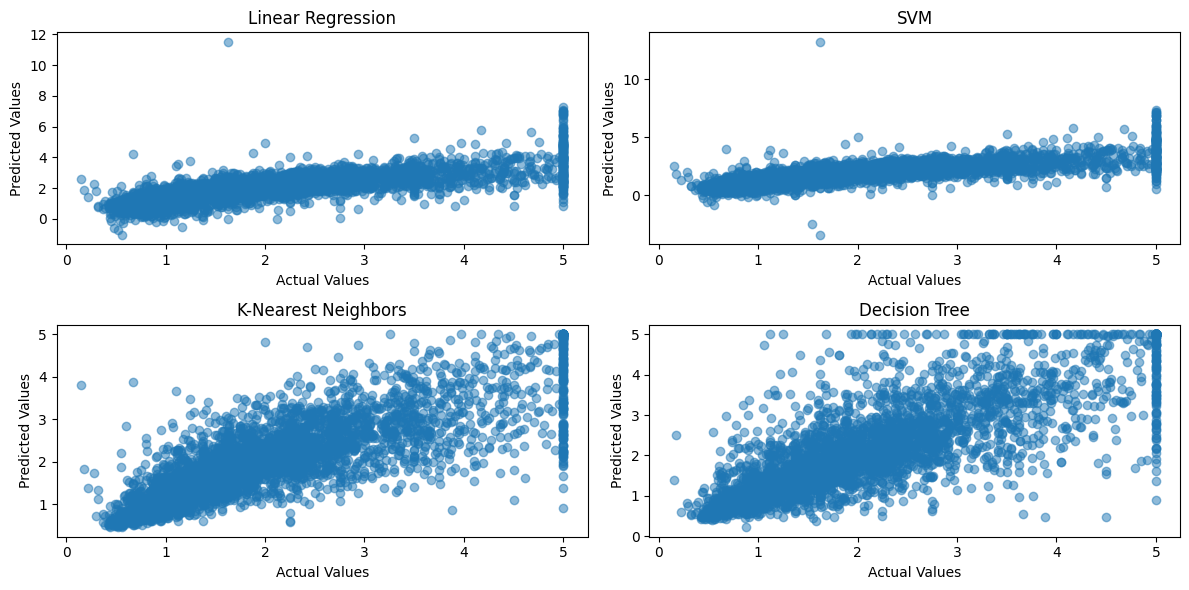

In [34]:
# Se crea un scatter plot para cada modelo.
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.scatter(df_LR['y'], df_LR['yhat'], alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')

plt.subplot(1, 4, 2)
plt.scatter(df_SVM['y'], df_SVM['yhat'], alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM')

plt.subplot(1, 4, 3)
plt.scatter(df_KNR['y'], df_KNR['yhat'], alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('K-Nearest Neighbors')

plt.subplot(1, 4, 4)
plt.scatter(df_DTree['y'], df_DTree['yhat'], alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree')

plt.tight_layout()
plt.show()

A partir de los resultados obtenidos, se observa que el modelo con el mejor rendimiento en cuanto a MAE y MSE es KNearestRegression. Por su parte, el árbol de decisión destaca por su desempeño superior en MAPE.
